Calculation of Dehnen profiles $S(\eta)$ and $n(\beta)$

$\rho = \rho_0 r^{-\gamma} (1 + r/a)^{4-\gamma}$

$\Sigma(R) = 2\int_0^\infty dz \rho(r) = 2\rho_0 a^{1-\gamma} S(R/a) $

$S(\eta) = \int_0^\infty d\zeta x^{-\gamma} (1+x)^{\gamma-4}$

$x = (\zeta^2 + \eta^2)^{1/2}$

$\eta = \frac{R}{a}$

$M(b) = 2 \pi \int_0^b dR R \Sigma(R) =  4 \pi \rho_0 a^{3-\gamma} n(\beta)$

$\beta = \frac{b}{a}$

$n(\beta) = \int_0^\beta d\eta \eta S(\eta)$


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from scipy import integrate

In [3]:
S = pd.read_csv(r'./data/dehnen_s.dat', delimiter='\s+')
N = pd.read_csv(r'./data/dehnen_n.dat', delimiter='\s+')

In [4]:
a = 5
ro0 = 10
gammas = np.arange(0, 3, 0.5)

eta = S['eta'] #np.linspace(1e-5, 100, 1001)
zeta = np.linspace(1e-5, 30000, 10001)
ETA, ZETA = np.meshgrid(eta, zeta)

In [5]:
S_ = pd.DataFrame(data={'eta' : eta})
N_ = pd.DataFrame(data={'eta' : eta[1:]})

In [6]:
zeta1 = np.linspace(1e-5, 30000, 10001)
zeta2 = np.geomspace(1e-5, 30000, 10001)
zeta3 = np.linspace(1e-5, 30000, 5001)
zeta4 = np.linspace(1e-5, 1000, 5001)

In [7]:
s_diff = pd.DataFrame(data={'eta' : eta})
gamma = 0
for i, zeta in enumerate([zeta1, zeta2, zeta3, zeta4]):
    ETA, ZETA = np.meshgrid(eta, zeta)
    s_diff[f'zeta{i}'] = integrate.simps(np.power(ZETA ** 2 + ETA ** 2, - gamma/2) * np.power(1 + np.sqrt(ZETA ** 2 + ETA ** 2), gamma - 4), axis=0)

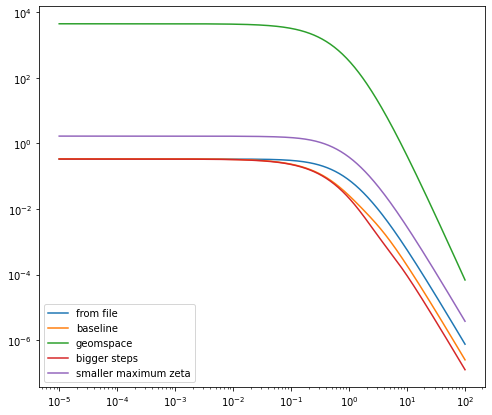

In [10]:
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(S['eta'], S['gamma=0'], label='from file')
ax.plot(s_diff['eta'], s_diff['zeta0'], label='baseline')
ax.plot(s_diff['eta'], s_diff['zeta1'], label='geomspace')
ax.plot(s_diff['eta'], s_diff['zeta2'], label='bigger steps')
ax.plot(s_diff['eta'], s_diff['zeta3'], label='smaller maximum zeta')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

In [8]:
for gamma in gammas:
    S_[f'gamma={gamma}'] = integrate.simps(np.power(ZETA ** 2 + ETA ** 2, - gamma/2) * np.power(1 + np.sqrt(ZETA ** 2 + ETA ** 2), gamma - 4), axis=0)

In [9]:
N_array = []
for gamma in gammas:
    for i in range(1, len(eta)):
        N_array.append(integrate.simps(eta[:i] * S_.loc[:i-1,f'gamma={gamma}'], x=eta[:i]))
    N_[f'gamma={gamma}'] = N_array
    N_array = []

In [10]:
colors = ['red', 'blue', 'orange', 'green', 'brown', 'purple']

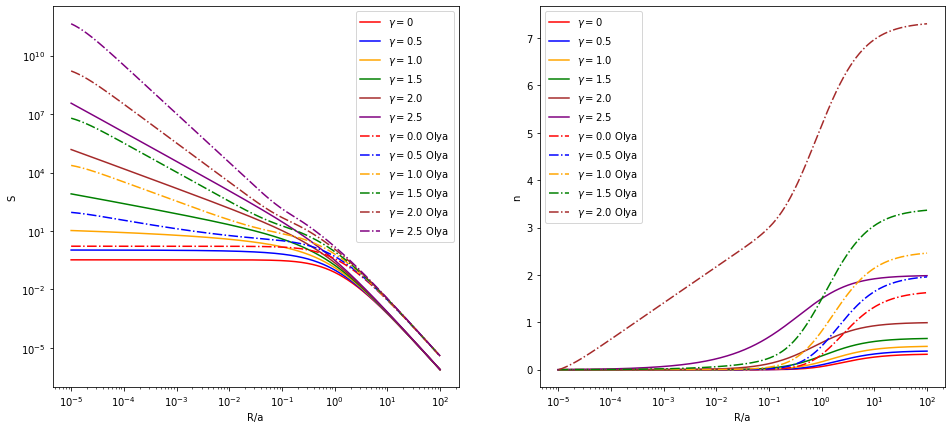

In [11]:
fig = plt.figure(figsize=(16,7))
spec = gridspec.GridSpec(ncols=2, nrows=1)

### figure 0: S(\eta)

ax0 = fig.add_subplot(spec[0])

for i, g in enumerate(S.columns[1:]):
    ax0.plot(S['eta'], S[g],   label=f'$\{g}$', c=colors[i])
    
for i, g in enumerate(S_.columns[1:]):
    ax0.plot(S_['eta'], S_[g],   label=f'$\{g}$ Olya', c=colors[i], ls='-.')


ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.set_xlabel('R/a')
ax0.set_ylabel('S')

ax0.legend()


### figure 1: n(\eta)

ax1 = fig.add_subplot(spec[1])

for i, g in enumerate(N.columns[1:]):
    ax1.plot(N['eta'], N[g],   label=f'$\{g}$', c=colors[i])
    
for i, g in enumerate(N_.columns[1:-1]):
    ax1.plot(N_['eta'], N_[g],   label=f'$\{g}$ Olya', c=colors[i], ls='-.')


ax1.set_xscale('log')

ax1.set_xlabel('R/a')
ax1.set_ylabel('n')

ax1.legend()

                